In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('movie_dataset_main_genre_all_gross.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3385 non-null   int64  
 1   title            3385 non-null   object 
 2   genre            3385 non-null   object 
 3   release_year     3385 non-null   int64  
 4   runtime          3385 non-null   float64
 5   rating           3385 non-null   float64
 6   vote_count       3385 non-null   int64  
 7   director         3385 non-null   object 
 8   cast1            3385 non-null   object 
 9   cast2            3381 non-null   object 
 10  cast3            3375 non-null   object 
 11  cast4            3374 non-null   object 
 12  overview         3385 non-null   object 
 13  gross            3385 non-null   float64
 14  poster_link      3385 non-null   object 
 15  source           3385 non-null   object 
 16  Action           3385 non-null   int64  
 17  Adventure     

In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df.head(
    
)

,title,genre,release_year,runtime,rating,vote_count,director,cast1,cast2,cast3,...,Mystery,Romance,Sci-Fi,Science Fiction,Sport,Thriller,TV Movie,War,Western,main_genre
0,The Shawshank Redemption,Drama,1994,142.0,9.3,2343110,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,0,0,0,0,0,0,0,0,0,Drama
1,The Godfather,"Crime, Drama",1972,175.0,9.2,1620367,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,0,0,0,0,0,0,0,0,0,Crime
2,The Dark Knight,"Action, Crime, Drama",2008,152.0,9.0,2303232,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,0,0,0,0,0,0,0,0,0,Action
3,The Godfather: Part II,"Crime, Drama",1974,202.0,9.0,1129952,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,0,0,0,0,0,0,0,0,0,Crime
4,12 Angry Men,"Crime, Drama",1957,96.0,9.0,689845,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,0,0,0,0,0,0,0,0,0,Crime


In [6]:
df.gross.value_counts()

gross
 0.0            547
 20115887.0     169
-3000000.0        8
-7000000.0        7
-5000000.0        5
               ... 
 45900000.0       1
 56500000.0       1
 94346243.0       1
 115723856.0      1
 294638258.0      1
Name: count, Length: 2543, dtype: int64

In [7]:
df2 = df.loc[df["gross"] <= 0]

In [8]:
df2.head()

,title,genre,release_year,runtime,rating,vote_count,director,cast1,cast2,cast3,...,Mystery,Romance,Sci-Fi,Science Fiction,Sport,Thriller,TV Movie,War,Western,main_genre
1052,Sin City: A Dame to Kill For,"Crime, Action, Thriller",2014,102.0,6.381,3762,Frank Miller,Jessica Alba,Bruce Willis,Mickey Rourke,...,0,0,0,0,0,1,0,0,0,Crime
1075,Once Upon a Time in America,"Drama, Crime",1984,229.0,8.413,5312,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,...,0,0,0,0,0,0,0,0,0,Drama
1076,Catwoman,"Action, Fantasy, Crime",2004,104.0,4.599,3265,Pitof,Halle Berry,Benjamin Bratt,Sharon Stone,...,0,0,0,0,0,0,0,0,0,Action
1162,Almost Famous,"Drama, Music",2000,124.0,7.509,2665,Cameron Crowe,Billy Crudup,Frances McDormand,Kate Hudson,...,0,0,0,0,0,0,0,0,0,Drama
1192,Gremlins 2: The New Batch,"Comedy, Horror, Fantasy",1990,106.0,6.400,2518,Joe Dante,Zach Galligan,Phoebe Cates,John Glover,...,0,0,0,0,0,0,0,0,0,Comedy


In [9]:
df2.to_csv('zero_and_neg_df.csv', index=False, header=True)

In [10]:
df = df.loc[df["gross"] > 0]
df

,title,genre,release_year,runtime,rating,vote_count,director,cast1,cast2,cast3,...,Mystery,Romance,Sci-Fi,Science Fiction,Sport,Thriller,TV Movie,War,Western,main_genre
0,The Shawshank Redemption,Drama,1994,142.0,9.300,2343110,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,0,0,0,0,0,0,0,0,0,Drama
1,The Godfather,"Crime, Drama",1972,175.0,9.200,1620367,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,0,0,0,0,0,0,0,0,0,Crime
2,The Dark Knight,"Action, Crime, Drama",2008,152.0,9.000,2303232,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,0,0,0,0,0,0,0,0,0,Action
3,The Godfather: Part II,"Crime, Drama",1974,202.0,9.000,1129952,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,0,0,0,0,0,0,0,0,0,Crime
4,12 Angry Men,"Crime, Drama",1957,96.0,9.000,689845,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,0,0,0,0,0,0,0,0,0,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,2012,"Action, Adventure, Science Fiction",2009,158.0,5.843,11829,Roland Emmerich,John Cusack,Amanda Peet,Chiwetel Ejiofor,...,0,0,0,1,0,0,0,0,0,Action
3381,42,Drama,2013,128.0,7.185,1771,Brian Helgeland,Chadwick Boseman,Harrison Ford,Nicole Beharie,...,0,0,0,0,0,0,0,0,0,Drama
3382,1992,"Crime, Thriller",2024,96.0,5.800,10,Ariel Vromen,Tyrese Gibson,Scott Eastwood,Ray Liotta,...,0,0,0,0,0,1,0,0,0,Crime
3383,1917,"War, History, Thriller",2019,119.0,7.992,12232,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,...,0,0,0,0,0,1,0,1,0,War


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2507 entries, 0 to 3384
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2507 non-null   object 
 1   genre            2507 non-null   object 
 2   release_year     2507 non-null   int64  
 3   runtime          2507 non-null   float64
 4   rating           2507 non-null   float64
 5   vote_count       2507 non-null   int64  
 6   director         2507 non-null   object 
 7   cast1            2507 non-null   object 
 8   cast2            2507 non-null   object 
 9   cast3            2507 non-null   object 
 10  cast4            2507 non-null   object 
 11  overview         2507 non-null   object 
 12  gross            2507 non-null   float64
 13  poster_link      2507 non-null   object 
 14  source           2507 non-null   object 
 15  Action           2507 non-null   int64  
 16  Adventure        2507 non-null   int64  
 17  Animation        25

In [12]:
df.to_csv('NO_zero_or_neg.csv', index=False, header=True)

In [13]:
cleaned_df = pd.read_csv('NO_zero_or_neg.csv')

In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2507 non-null   object 
 1   genre            2507 non-null   object 
 2   release_year     2507 non-null   int64  
 3   runtime          2507 non-null   float64
 4   rating           2507 non-null   float64
 5   vote_count       2507 non-null   int64  
 6   director         2507 non-null   object 
 7   cast1            2507 non-null   object 
 8   cast2            2507 non-null   object 
 9   cast3            2507 non-null   object 
 10  cast4            2507 non-null   object 
 11  overview         2507 non-null   object 
 12  gross            2507 non-null   float64
 13  poster_link      2507 non-null   object 
 14  source           2507 non-null   object 
 15  Action           2507 non-null   int64  
 16  Adventure        2507 non-null   int64  
 17  Animation     

<Axes: ylabel='rating'>

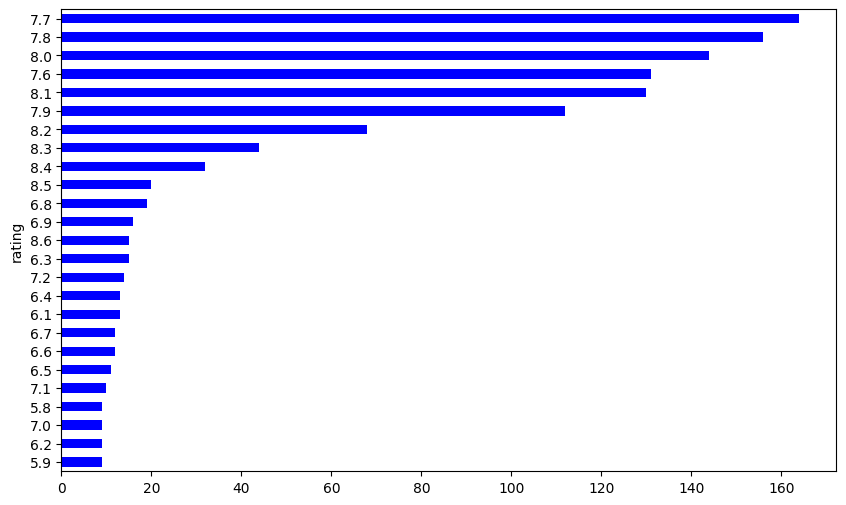

In [15]:
cleaned_df['rating'].value_counts().head(25).sort_values(ascending=True).plot.barh(color='blue', figsize=(10, 6))

In [16]:
cleaned_df[(cleaned_df['rating'] >= 7.6) & (cleaned_df['rating'] <= 8.4)].shape[0]

1149

In [17]:
total_gross = cleaned_df['gross'].sum()
total_gross

292370652019.0

In [18]:
filtered_df = cleaned_df[(cleaned_df['rating'] >= 7.6) & (cleaned_df['rating'] <= 8.4)]

# Calculate the sum of the 'gross' column for the filtered DataFrame
filtered_gross = filtered_df['gross'].sum()
filtered_gross

103428891108.0

In [19]:
gross_perc = (filtered_gross / total_gross) * 100
gross_perc

35.3759484386547

In [20]:
# Sort the DataFrame by the 'gross' column in descending order
sorted_df = cleaned_df.sort_values(by='gross', ascending=False)

# Set the index to the 'gross' column
new_df = sorted_df.set_index('title')

# Display the new DataFrame
new_df.head()  # This will show the first few rows of the new DataFrame

,genre,release_year,runtime,rating,vote_count,director,cast1,cast2,cast3,cast4,...,Mystery,Romance,Sci-Fi,Science Fiction,Sport,Thriller,TV Movie,War,Western,main_genre
title,,,,,,,,,,,,,,,,,,,,,
Avatar: The Way of Water,"Science Fiction, Adventure, Action",2022,192.0,7.621,11736,James Cameron,Sam Worthington,Zoe Saldaña,Sigourney Weaver,Stephen Lang,...,0,0,0,1,0,0,0,0,0,Science Fiction
Star Wars: The Force Awakens,"Adventure, Action, Science Fiction",2015,136.0,7.275,19196,J.J. Abrams,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,...,0,0,0,1,0,0,0,0,0,Adventure
Avengers: Infinity War,"Adventure, Action, Science Fiction",2018,149.0,8.246,29469,Joe Russo,Robert Downey Jr.,Chris Evans,Chris Hemsworth,Josh Brolin,...,0,0,0,1,0,0,0,0,0,Adventure
Spider-Man: No Way Home,"Action, Adventure, Science Fiction",2021,148.0,7.960,19892,Jon Watts,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,...,0,0,0,1,0,0,0,0,0,Action
Jurassic World,"Action, Adventure, Science Fiction, Thriller",2015,124.0,6.691,20192,Colin Trevorrow,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,...,0,0,0,1,0,1,0,0,0,Action


In [21]:
# Filter the DataFrame for ratings between 7.6 and 8.4
filtered_df = new_df[(new_df['rating'] >= 7.6) & (new_df['rating'] <= 8.4)]

# Calculate the sum of the 'gross' values in the filtered DataFrame
gross_sum = filtered_df['gross'].sum()

# Display the result
gross_sum

103428891108.0

In [22]:
# Calculate the threshold for the top 10% of gross values
threshold = new_df['gross'].quantile(0.9)

# Filter the DataFrame for the top 10% of gross values
top_10_percent_df = new_df[new_df['gross'] >= threshold]

# Get the list of ratings and sort them from smallest to largest
sorted_ratings = top_10_percent_df['rating'].sort_values().unique()

# Display the sorted ratings
sorted_ratings

array([5.621, 5.8  , 5.843, 5.885, 5.894, 5.907, 5.938, 5.971, 6.   ,
       6.011, 6.06 , 6.083, 6.099, 6.1  , 6.191, 6.2  , 6.205, 6.206,
       6.245, 6.248, 6.256, 6.298, 6.3  , 6.319, 6.354, 6.373, 6.377,
       6.4  , 6.431, 6.447, 6.449, 6.482, 6.5  , 6.51 , 6.512, 6.518,
       6.525, 6.534, 6.537, 6.545, 6.554, 6.568, 6.579, 6.582, 6.6  ,
       6.602, 6.626, 6.655, 6.688, 6.691, 6.692, 6.7  , 6.705, 6.706,
       6.709, 6.715, 6.726, 6.744, 6.754, 6.796, 6.811, 6.818, 6.825,
       6.844, 6.848, 6.854, 6.856, 6.867, 6.875, 6.897, 6.9  , 6.907,
       6.913, 6.918, 6.92 , 6.932, 6.935, 6.958, 6.964, 6.967, 6.977,
       7.   , 7.012, 7.04 , 7.052, 7.054, 7.057, 7.1  , 7.104, 7.108,
       7.114, 7.137, 7.139, 7.161, 7.185, 7.195, 7.198, 7.2  , 7.205,
       7.214, 7.234, 7.242, 7.259, 7.274, 7.275, 7.288, 7.298, 7.3  ,
       7.308, 7.323, 7.324, 7.327, 7.33 , 7.337, 7.339, 7.357, 7.361,
       7.364, 7.377, 7.384, 7.393, 7.4  , 7.419, 7.425, 7.427, 7.428,
       7.431, 7.433,

In [23]:
# Get the largest 10 values in the 'gross' column
largest_10_gross = cleaned_df['gross'].nlargest(23)

# Calculate the sum of these largest 10 values
sum_largest_10 = largest_10_gross.sum()

# Display the result
sum_largest_10

29195125170.0

In [24]:
sum_largest_10 / total_gross * 100

9.985655184058189

In [25]:
# Get the largest 23 values in the 'gross' column along with their corresponding ratings
largest_23_df = cleaned_df.nlargest(23, 'gross')[['gross', 'rating', 'title', 'release_year']]

# Display the new DataFrame
largest_23_df

,gross,rating,title,release_year
1936,1.860250e+09,7.621,Avatar: The Way of Water,2022
2008,1.823224e+09,7.275,Star Wars: The Force Awakens,2015
2135,1.752415e+09,8.246,Avengers: Infinity War,2018
2362,1.721847e+09,7.960,Spider-Man: No Way Home,2021
1997,1.521537e+09,6.691,Jurassic World,2015
2240,1.403000e+09,7.114,The Lion King,2019
2022,1.325400e+09,7.234,Furious 7,2015
2200,1.318733e+09,8.205,Top Gun: Maverick,2022
1816,1.298816e+09,7.718,The Avengers,2012
2297,1.262000e+09,7.655,The Super Mario Bros. Movie,2023


In [26]:
largest_23_df.sort_values(by='rating', ascending=False)

,gross,rating,title,release_year
1029,1.024889e+09,8.481,The Lord of the Rings: The Return of the King,2003
2135,1.752415e+09,8.246,Avengers: Infinity War,2018
2200,1.318733e+09,8.205,Top Gun: Maverick,2022
1712,1.216511e+09,8.096,Harry Potter and the Deathly Hallows: Part 2,2011
2362,1.721847e+09,7.960,Spider-Man: No Way Home,2021
477,9.366622e+08,7.900,Star Wars: Episode VII - The Force Awakens,2015
1816,1.298816e+09,7.718,The Avengers,2012
2322,1.117173e+09,7.673,Deadpool & Wolverine,2024
2297,1.262000e+09,7.655,The Super Mario Bros. Movie,2023
1936,1.860250e+09,7.621,Avatar: The Way of Water,2022


In [27]:
rating_below_seven_df = cleaned_df[cleaned_df['rating'] < 7]
# After that, to sum up all values in the gross column of this new DataFrame, you can use:

total_gross_below_seven = rating_below_seven_df['gross'].sum()
total_gross_below_seven

111051218879.0

In [28]:
total_gross_below_seven / total_gross * 100

37.983025352278936

In [29]:
rating_below_seven_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 1004 to 2506
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            916 non-null    object 
 1   genre            916 non-null    object 
 2   release_year     916 non-null    int64  
 3   runtime          916 non-null    float64
 4   rating           916 non-null    float64
 5   vote_count       916 non-null    int64  
 6   director         916 non-null    object 
 7   cast1            916 non-null    object 
 8   cast2            916 non-null    object 
 9   cast3            916 non-null    object 
 10  cast4            916 non-null    object 
 11  overview         916 non-null    object 
 12  gross            916 non-null    float64
 13  poster_link      916 non-null    object 
 14  source           916 non-null    object 
 15  Action           916 non-null    int64  
 16  Adventure        916 non-null    int64  
 17  Animation        

In [30]:
director_df = cleaned_df[cleaned_df['rating'] >= 7][['director', 'rating', 'title', 'release_year']]
director_df

,director,rating,title,release_year
0,Frank Darabont,9.300,The Shawshank Redemption,1994
1,Francis Ford Coppola,9.200,The Godfather,1972
2,Christopher Nolan,9.000,The Dark Knight,2008
3,Francis Ford Coppola,9.000,The Godfather: Part II,1974
4,Sidney Lumet,9.000,12 Angry Men,1957
...,...,...,...,...
2495,John Gibbs,7.100,Transformers: 40th Anniversary Event,2024
2497,Justin Folk,7.000,Am I Racist?,2024
2498,Zack Snyder,7.185,300,2007
2503,Brian Helgeland,7.185,42,2013


In [31]:
pd.set_option('display.max_colwidth', None)
average_ratings_df = cleaned_df.groupby('director').agg(
    average_rating=('rating', 'mean'),
    total_films=('title', 'count'),
    all_titles=('title', lambda x: ', '.join(x))
).reset_index()

sorted_directors = average_ratings_df.sort_values(by='average_rating', ascending=False)
sorted_directors.head(20)

,director,average_rating,total_films,all_titles
339,Fernando Meirelles,8.60000,1,Cidade de Deus
700,Masaki Kobayashi,8.60000,1,Seppuku
934,Roberto Benigni,8.60000,1,La vita è bella
1055,Sudha Kongara,8.60000,1,Soorarai Pottru
1086,Thomas Kail,8.60000,1,Hamilton
811,Olivier Nakache,8.50000,1,The Intouchables
766,Milos Forman,8.50000,2,"One Flew Over the Cuckoo's Nest, Amadeus"
767,Miloš Forman,8.41600,1,One Flew Over the Cuckoo's Nest
349,Frank Darabont,8.40780,5,"The Shawshank Redemption, The Green Mile, The Shawshank Redemption, The Green Mile, The Mist"
127,Bob Persichetti,8.40050,2,"Spider-Man: Into the Spider-Verse, Spider-Man: Into the Spider-Verse"


In [32]:
# Step 1: Count total movies per release year
total_movies = cleaned_df.groupby('release_year').size().reset_index(name='total_movies')

# Step 2: Count drama movies per release year
drama_movies = cleaned_df[cleaned_df['main_genre'] == 'Drama'].groupby('release_year').size().reset_index(name='drama_movies')

# Step 3: Merge the two DataFrames
drama_summary = pd.merge(total_movies, drama_movies, on='release_year', how='left').fillna(0)

# Step 4: Calculate the percentage of drama movies
drama_summary['percentage_drama'] = (drama_summary['drama_movies'] / drama_summary['total_movies']) * 100

# Step 5: Create the final drama_df
drama_df = drama_summary[['release_year', 'percentage_drama']]
drama_df

,release_year,percentage_drama
0,1920,0.000000
1,1921,0.000000
2,1922,0.000000
3,1924,0.000000
4,1925,50.000000
...,...,...
98,2020,19.047619
99,2021,5.555556
100,2022,8.695652
101,2023,12.676056


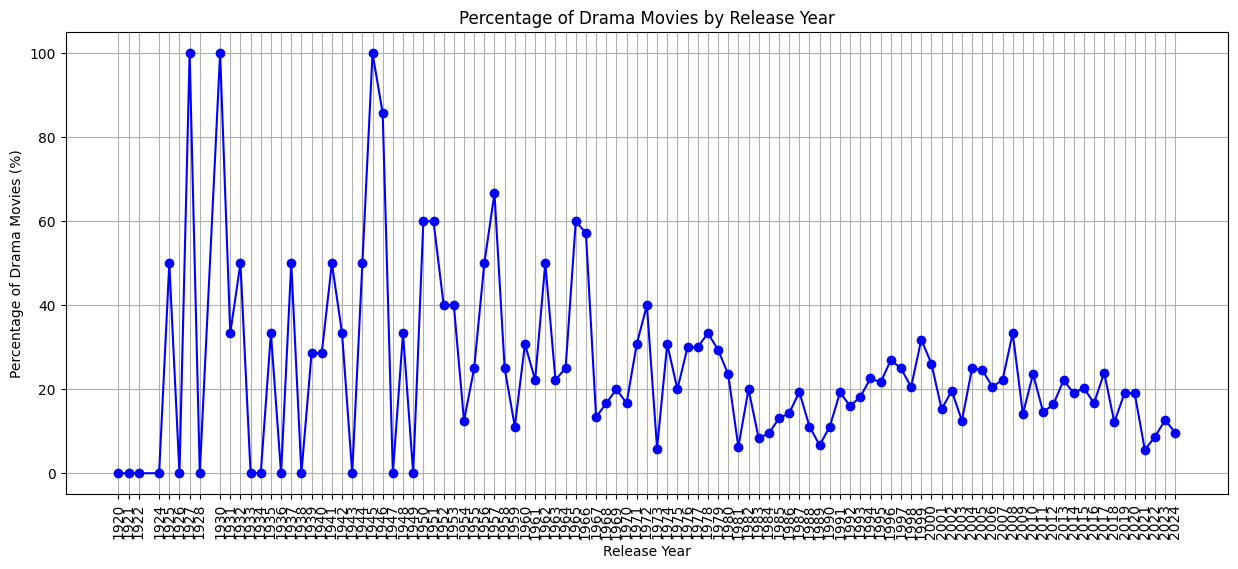

In [33]:
import matplotlib.pyplot as plt

# Assuming drama_df is already created
# drama_df = pd.DataFrame({
#     'release_year': [2022, 2023],
#     'percentage_drama': [60.0, 20.0]
# })

plt.figure(figsize=(15, 6))
plt.plot(drama_df['release_year'], drama_df['percentage_drama'], marker='o', color='b')
plt.title('Percentage of Drama Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Drama Movies (%)')
plt.xticks(drama_df['release_year'], rotation = 90)  # Ensure all years are shown on x-axis
plt.grid()
plt.show()

In [34]:
# Step 2: Count drama movies per release year
comedy_movies = cleaned_df[cleaned_df['main_genre'] == 'Comedy'].groupby('release_year').size().reset_index(name='comedy_movies')

# Step 3: Merge the two DataFrames
comedy_summary = pd.merge(total_movies, comedy_movies, on='release_year', how='left').fillna(0)

# Step 4: Calculate the percentage of drama movies
comedy_summary['percentage_comedy'] = (comedy_summary['comedy_movies'] / comedy_summary['total_movies']) * 100

# Step 5: Create the final drama_df
comedy_df = comedy_summary[['release_year', 'percentage_comedy']]
comedy_df

,release_year,percentage_comedy
0,1920,0.000000
1,1921,100.000000
2,1922,0.000000
3,1924,0.000000
4,1925,0.000000
...,...,...
98,2020,9.523810
99,2021,5.555556
100,2022,8.695652
101,2023,12.676056


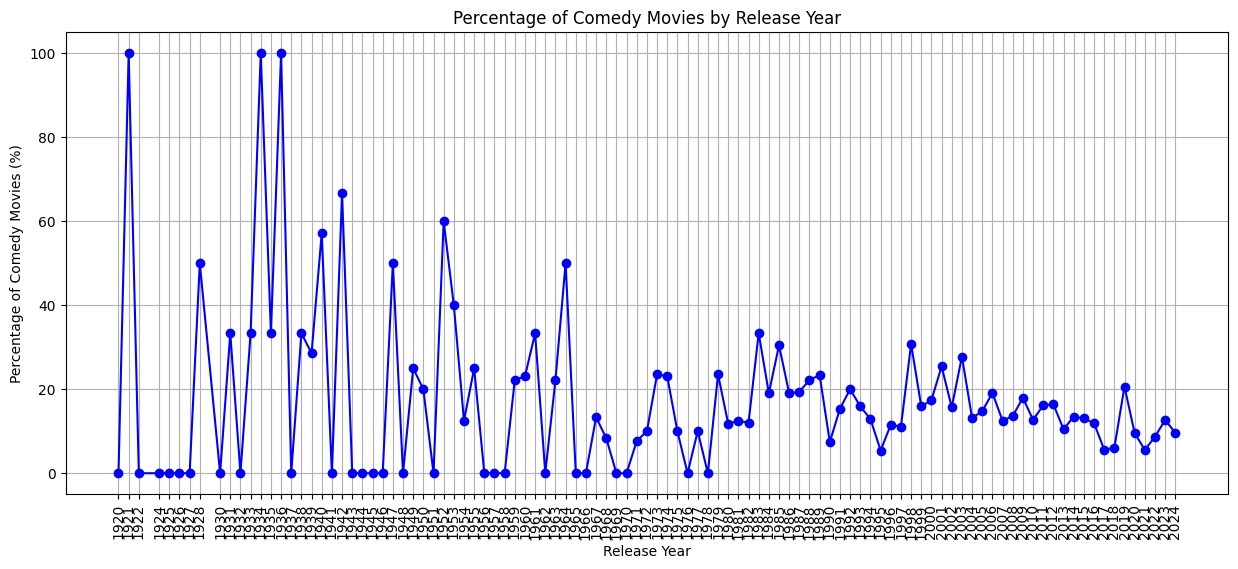

In [35]:
import matplotlib.pyplot as plt

# Assuming drama_df is already created
# drama_df = pd.DataFrame({
#     'release_year': [2022, 2023],
#     'percentage_drama': [60.0, 20.0]
# })

plt.figure(figsize=(15, 6))
plt.plot(comedy_df['release_year'], comedy_df['percentage_comedy'], marker='o', color='b')
plt.title('Percentage of Comedy Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Comedy Movies (%)')
plt.xticks(comedy_df['release_year'], rotation = 90)  # Ensure all years are shown on x-axis
plt.grid()
plt.show()

     release_year  percentage_thriller
0            1920                  0.0
1            1921                  0.0
2            1922                  0.0
3            1924                  0.0
4            1925                  0.0
..            ...                  ...
98           2020                  0.0
99           2021                  0.0
100          2022                  0.0
101          2023                  0.0
102          2024                  0.0

[103 rows x 2 columns]


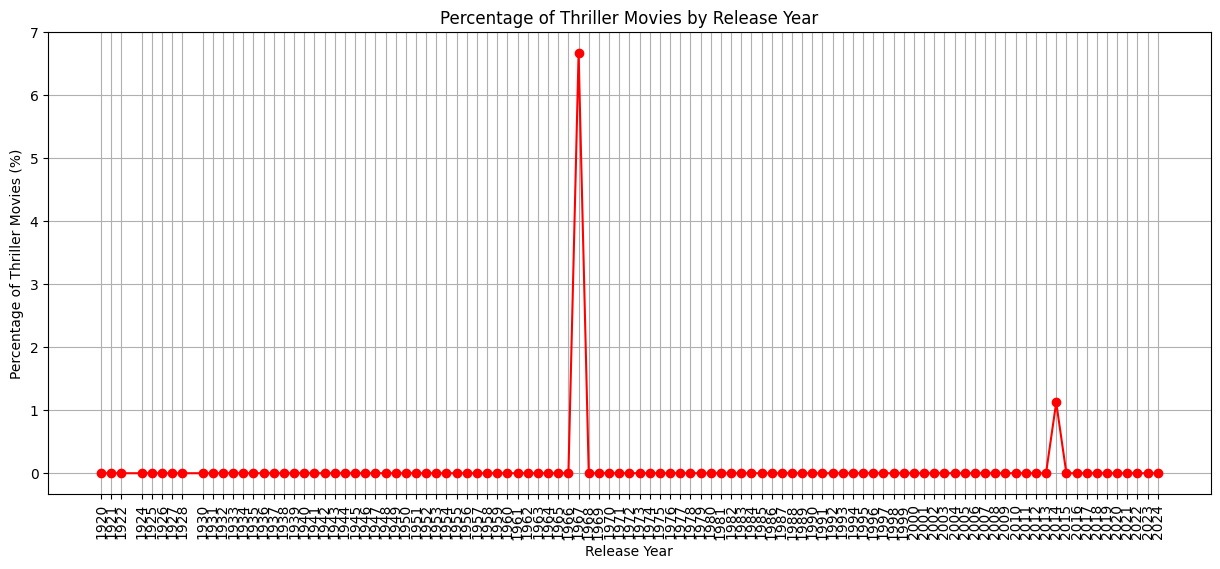

In [36]:
# Step 2: Count thriller movies per release year
thriller_movies = cleaned_df[cleaned_df['genre'] == 'Thriller'].groupby('release_year').size().reset_index(name='thriller_movies')

# Step 3: Merge the two DataFrames
thriller_summary = pd.merge(total_movies, thriller_movies, on='release_year', how='left').fillna(0)

# Step 4: Calculate the percentage of thriller movies
thriller_summary['percentage_thriller'] = (thriller_summary['thriller_movies'] / thriller_summary['total_movies']) * 100

# Step 5: Create the final thriller_df
thriller_df = thriller_summary[['release_year', 'percentage_thriller']]

print(thriller_df)
# Step 2: Create a Line Graph
#Now, you can create a line graph using either Matplotlib or hvPlot.

#Using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(thriller_df['release_year'], thriller_df['percentage_thriller'], marker='o', color='r')
plt.title('Percentage of Thriller Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Thriller Movies (%)')
plt.xticks(thriller_df['release_year'], rotation = 90)  # Ensure all years are shown on x-axis
plt.grid()
plt.show()

In [37]:
cleaned_df['genre'].value_counts()

genre
Drama                                         135
Drama, Romance                                 65
Comedy                                         62
Horror, Thriller                               60
Comedy, Drama                                  56
                                             ... 
Adventure, Drama, Action, Romance, Family       1
Fantasy, Action, Thriller, Science Fiction      1
Crime, Drama, Horror, Thriller                  1
Family, Animation, Drama                        1
War, History, Thriller                          1
Name: count, Length: 718, dtype: int64

In [38]:
# Step 1: Count the number of movies per release year and main genre
genre_counts = cleaned_df.groupby(['release_year', 'main_genre']).size().reset_index(name='count')

# Step 2: Calculate total movies per release year
total_movies = cleaned_df.groupby('release_year').size().reset_index(name='total_movies')

# Step 3: Merge counts with total movies
genre_summary = pd.merge(genre_counts, total_movies, on='release_year')

# Step 4: Calculate the percentage of each genre
genre_summary['percentage'] = (genre_summary['count'] / genre_summary['total_movies']) * 100

# Step 5: Create the final genre_df with required columns
genre_df = genre_summary[['release_year', 'main_genre', 'percentage']]

genre_df.head(50)

,release_year,main_genre,percentage
0,1920,Fantasy,100.000000
1,1921,Comedy,100.000000
2,1922,Fantasy,100.000000
3,1924,Action,100.000000
4,1925,Adventure,50.000000
5,1925,Drama,50.000000
6,1926,Action,100.000000
7,1927,Drama,100.000000
8,1928,Biography,50.000000
9,1928,Comedy,50.000000


In [68]:
import hvplot.pandas
from bokeh.io import curdoc
from bokeh.plotting import figure, show

curdoc().theme = "dark_minimal"

# Create a stacked bar chart using hvPlot
stacked_bar_chart = genre_df.hvplot.line(
    x='release_year',
    y='percentage',
    by='main_genre',  # This will create a stack for each main_genre
    title='Percentage of Genre by Release Year',
    xlabel='Release Year',
    ylabel='Percentage of Genre to # of Movies (%)',
    stacked=True,  # This parameter makes the bars stacked
    width=1500,  # Adjust the width as needed
    height=600   # Adjust the height as needed
).opts(
    # bgcolor='black',  # Change to your desired background color
    fontsize={'title': '20pt', 'labels': '14pt'},  # Set font sizes for title and labels
    text_color='black',
    background_fill_color='black',
    border_color='black',
    border_line_color='black'
)
# Display the stacked bar chart
stacked_bar_chart

ValueError: Unexpected option 'outline_line_color' for NdOverlay type across all extensions. Similar options for current extension ('bokeh') are: ['border_hover_line_color', 'border_line_color', 'border_muted_line_color'].

In [48]:
genre_df[genre_df['release_year'] == 2024].sort_values(by='percentage', ascending=False)

,release_year,main_genre,percentage
717,2024,Horror,25.000000
709,2024,Action,11.538462
712,2024,Comedy,9.615385
714,2024,Drama,9.615385
711,2024,Animation,7.692308
713,2024,Crime,5.769231
722,2024,Thriller,5.769231
718,2024,Music,3.846154
719,2024,Mystery,3.846154
720,2024,Romance,3.846154


In [49]:
genre_df.to_csv('genre_df.csv', index=False, header=True)